In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

C:\Users\mouno\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install pandas-label-encoder

  Obtaining dependency information for pandas==1.5.2 from https://files.pythonhosted.org/packages/af/25/4cbf835f48366ac1007ca959781d1ac770caa36cd27af148dacdde18d397/pandas-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-1.5.2-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.5.2-cp311-cp311-win_amd64.whl (10.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mouno\\anaconda3\\Lib\\site-packages\\~~ndas.libs\\msvcp140-ef6047a69b174ada5cb2eff1d2bc9a62.dll'
Consider using the `--user` option or check the permissions.



In [3]:
pip install --upgrade pandas


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-label-encoder 1.0.1 requires pandas==1.5.2, but you have pandas 2.2.2 which is incompatible.


In [4]:
import pandas as pd
print(pd.__version__)


2.2.2


In [5]:
df1 = pd.read_csv('deliveries.csv')
df= pd.read_csv('matches.csv')

In [6]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
df.shape

(756, 18)

In [8]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


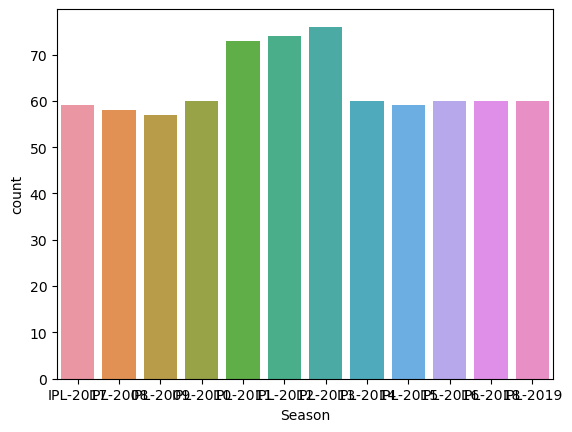

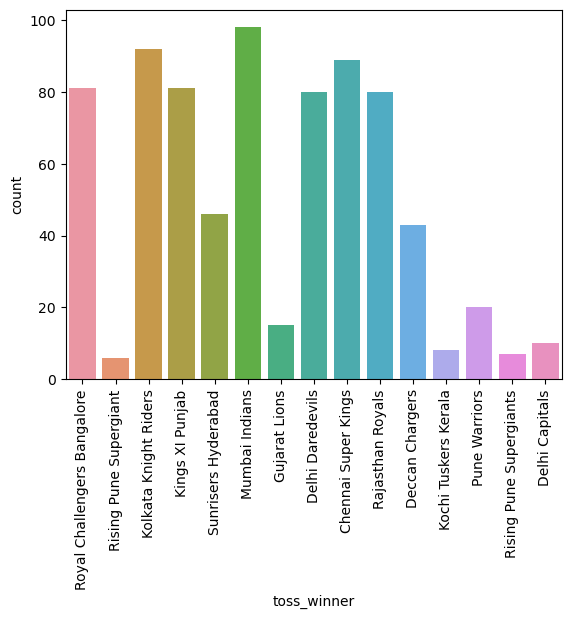

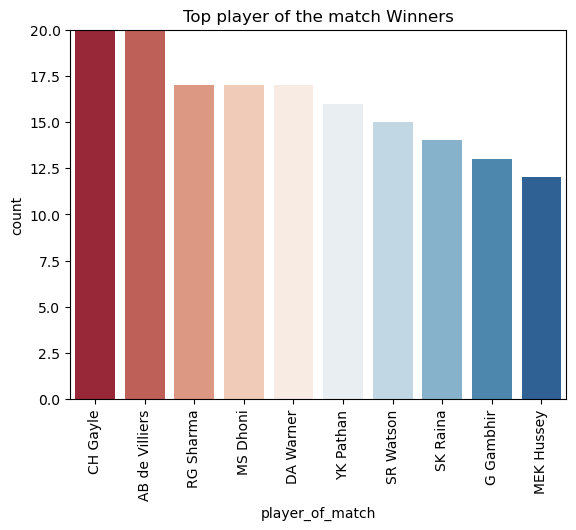

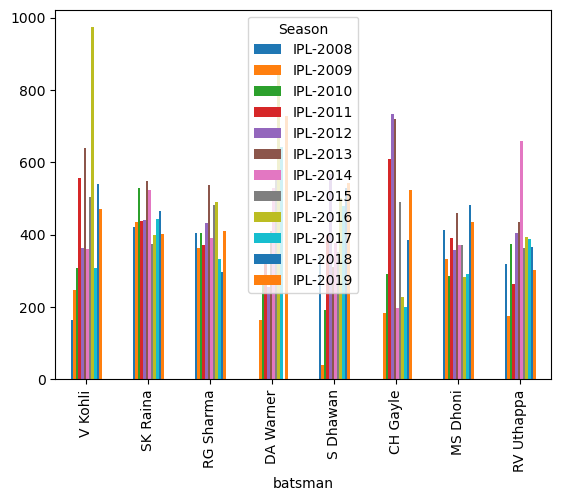

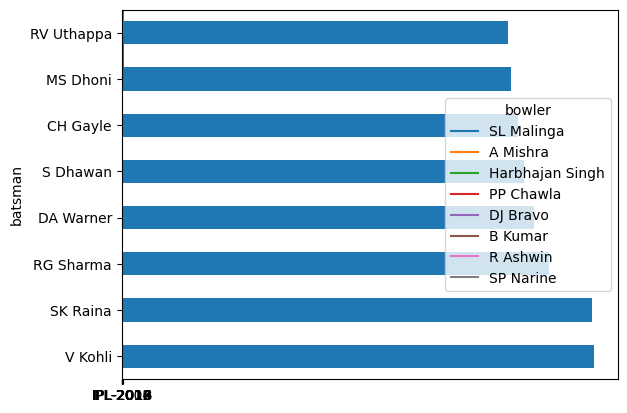

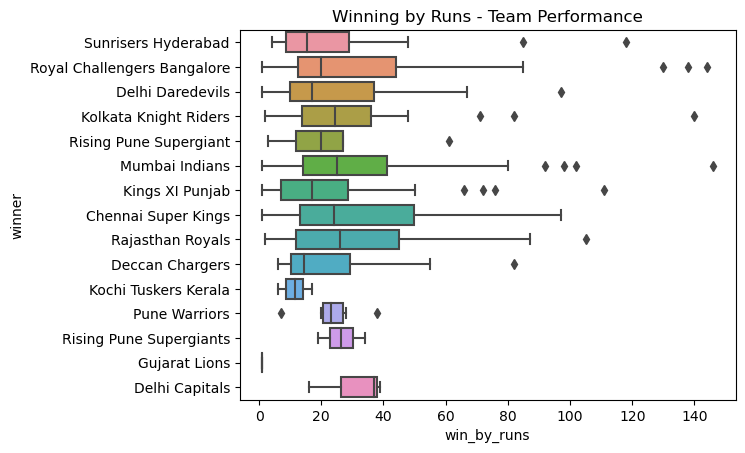

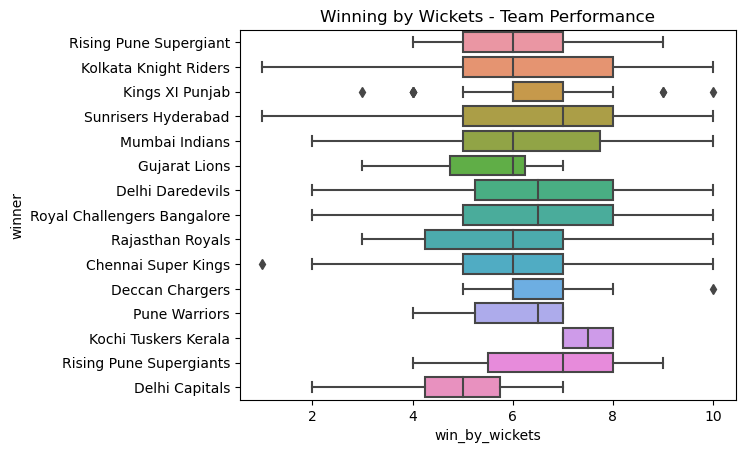

In [9]:
grp_batsman=df1.groupby(['match_id','inning','batting_team','batsman'])
batsman=grp_batsman['batsman_runs'].sum().reset_index()
faced_balls=df1[df1['wide_runs']==0]
faced_balls=faced_balls.groupby(['match_id','inning','batsman'])['batsman_runs'].count().reset_index()
faced_balls.columns=['match_id','inning','batsman','faced_balls']
batsman=batsman.merge(faced_balls,left_on=['match_id','inning','batsman'],right_on=['match_id','inning','batsman'],how='left')
fours=df1[df1['batsman_runs']==4]
sixes=df1[df1['batsman_runs']==6]
batsman_fours=fours.groupby(['match_id','inning','batsman'])['batsman_runs'].count().reset_index()
batsman_sixes=sixes.groupby(['match_id','inning','batsman'])['batsman_runs'].count().reset_index()
batsman_fours.columns=['match_id','inning','batsman','4s']
batsman_sixes.columns=['match_id','inning','batsman','6s']
batsman=batsman.merge(batsman_fours,left_on=['match_id','inning','batsman'],right_on=['match_id','inning','batsman'],how='left')
batsman=batsman.merge(batsman_sixes,left_on=['match_id','inning','batsman'],right_on=['match_id','inning','batsman'],how='left')
batsman['SR']=np.round(batsman['batsman_runs']/batsman['faced_balls']*100,2)
for col in ['batsman_runs','4s','6s','faced_balls','SR']:
    batsman[col]=batsman[col].fillna(0)
dismissals=df1[pd.notnull(df1['player_dismissed'])]
dismissals=dismissals[['match_id','inning','player_dismissed','dismissal_kind','fielder']]
dismissals.rename(columns={'player_dismissed':'batsman'},inplace=True)
batsman=batsman.merge(dismissals,left_on=['match_id','inning','batsman'],right_on=['match_id','inning','batsman'],how='left')
batsman=df[['id','Season']].merge(batsman, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsman.head()

grp_bowler = df1.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])  
bowlers = grp_bowler[["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"]].sum().reset_index()  
bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])  
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]  
del( bowlers["bye_runs"])  
del( bowlers["legbye_runs"]) 
del( bowlers["total_runs"])  
dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
dismissals=df1[df1["dismissal_kind"].isin(dismissal_kinds_for_bowler)]  
dismissals=dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()  
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)  
bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"],right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")  
bowlers["wickets"] = bowlers["wickets"].fillna(0)  
over_bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()  
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over',axis= 1)  
bowlers = over_bowlers.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')  
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)  
bowlers = df[['id','Season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)  
bowlers.head(10)  

df.describe()
sns.countplot(x='Season',data=df)
plt.show()
sns.countplot(x='toss_winner',data=df)
plt.xticks(rotation=90)
plt.show()
top_players = df.player_of_match.value_counts()[:10]    
fig, ax = plt.subplots()  
ax.set_ylim([0,20])  
ax.set_ylabel("Number of Awards")  
ax.set_xlabel("Name of Players")  
ax.set_title("Top player of the match Winners")  
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="RdBu");  
plt.xticks(rotation = 'vertical')  
plt.show()  
runsperseson_by_batsman = batsman.groupby(['Season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()  
runsperseson_by_batsman = runsperseson_by_batsman.groupby(['Season', 'batsman'])['batsman_runs'].sum().unstack().T  
runsperseson_by_batsman['Total'] = runsperseson_by_batsman.sum(axis=1) 
runsperseson_by_batsman = runsperseson_by_batsman.sort_values(by = 'Total', ascending = False).drop('Total', axis=1)  
ax.set_ylabel('Number of Runs')  
ax = runsperseson_by_batsman[:8].plot(kind='bar') 
wicketsperseason_by_bowler = bowlers.groupby(['Season', 'bowling_team', 'bowler'])['wickets'].sum().reset_index()  
wicketsperseason_by_bowler = wicketsperseason_by_bowler.groupby(['Season', 'bowler'])['wickets'].sum().unstack().T  
wicketsperseason_by_bowler ['Total'] = wicketsperseason_by_bowler .sum(axis=1) 
wicketsperseason_by_bowler  = wicketsperseason_by_bowler .sort_values(by = 'Total', ascending = False).drop('Total', axis=1)  
ax = wicketsperseason_by_bowler [:8].T.plot()  
runs_scored=batsman.groupby(['batsman'])['batsman_runs'].sum()  
runs_scored=runs_scored.sort_values(ascending=False)  
top10runs = runs_scored.head(8)  
top10runs.plot(kind='barh')  
plt.show()
fig, ax = plt.subplots()   
ax.set_xlabel("Runs")  
ax.set_title("Winning by Runs - Team Performance")  
sns.boxplot(y = 'winner', x = 'win_by_runs', data=df[df['win_by_runs']>0], orient = 'h'); 
plt.show()  
fig, ax = plt.subplots()  
ax.set_title("Winning by Wickets - Team Performance")   
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=df[df['win_by_wickets']>0], orient = 'h'); 
plt.show()  

In [10]:
total_score_df =df1.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [11]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [12]:
match_df =df.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [16]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [17]:
match_df = match_df[match_df['dl_applied']==0]

In [18]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [20]:
delivery_df =match_df.merge(df1,on='match_id')

In [21]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [22]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [23]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [24]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1

In [25]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [26]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [27]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)


In [28]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [29]:
delivery_df['wickets']=10- wickets

In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [31]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [32]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [33]:
delivery_df = delivery_df.reset_index()


In [34]:
delivery_df.drop(columns='index',inplace=True)

In [35]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner
            


In [36]:
delivery_df['winner']=is_win(delivery_df)

In [37]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]


In [38]:

final_df =final_df.sample(final_df.shape[0])


In [39]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [40]:
print(final_df.city.unique())
print(final_df.batting_team.unique())


['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Hyderabad' 'Kimberley' 'Chennai'
 'Abu Dhabi' 'Durban' 'Jaipur' 'Raipur' 'Ahmedabad' 'Bengaluru'
 'Chandigarh' nan 'Pune' 'Cuttack' 'Sharjah' 'Johannesburg' 'Indore'
 'Visakhapatnam' 'Ranchi' 'Centurion' 'Mohali' 'Port Elizabeth'
 'Cape Town' 'Dharamsala' 'East London' 'Nagpur' 'Bloemfontein']
['Kolkata Knight Riders' 'Sunrisers Hyderabad' 'Mumbai Indians'
 'Rajasthan Royals' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Delhi Capitals']


In [41]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city
        

final_df['city']=final_df.apply(fill_city,axis=1)

In [42]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [43]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [46]:

ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf', OneHotEncoder(categories=category, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')



In [47]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab...
       'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack',
       'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata',
       'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [48]:
y_pred = pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[0.64213014, 0.35786986],
       [0.67153944, 0.32846056],
       [0.04846839, 0.95153161],
       ...,
       [0.64427766, 0.35572234],
       [0.28644069, 0.71355931],
       [0.77543536, 0.22456464]])

In [49]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [50]:
temp_df ,target =match_progression(delivery_df,513,pipe)

Target- 189


Text(0.5, 1.0, 'Target-189')

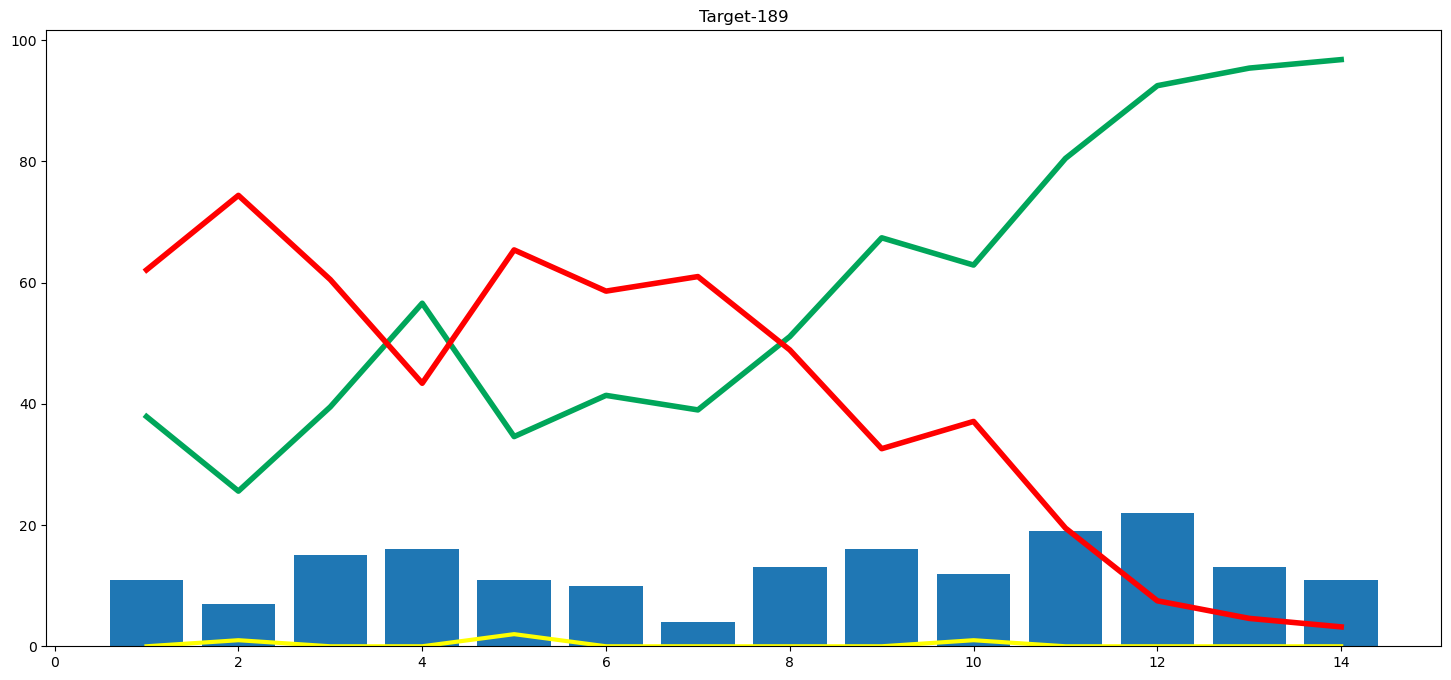

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [52]:

delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [53]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [54]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [55]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
5718,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,169,113,10,178,8.571429,8.973451
61196,Chennai Super Kings,Royal Challengers Bangalore,Bengaluru,213,119,10,213,6.000000,10.739496
22979,Mumbai Indians,Chennai Super Kings,Mumbai,69,31,5,168,6.741573,13.354839
38207,Royal Challengers Bangalore,Mumbai Indians,Mumbai,91,21,3,194,6.303030,26.000000
31369,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,78,15,5,190,6.457143,31.200000
...,...,...,...,...,...,...,...,...,...
8409,Chennai Super Kings,Royal Challengers Bangalore,Chennai,58,49,8,126,5.830986,7.102041
11360,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,14,12,6,139,7.000000,7.000000
7648,Sunrisers Hyderabad,Delhi Capitals,Delhi,112,62,7,194,8.586207,10.838710
72275,Chennai Super Kings,Delhi Capitals,Visakhapatnam,15,19,7,155,8.376238,4.736842
